In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math
from scipy.stats.mstats import gmean
from scipy.stats import gamma, poisson, linregress, beta, norm, lognorm
from scipy import optimize
import time
import random
import pickle as pkl
from cratrcountr import *
%matplotlib inline

In [2]:
t1 = time.time()
N_array = np.logspace(-2, 8, 3000)
if False:
    error_bar_matrix = np.array([
        error_bar_log_N(N, n_points=1000000, log_spacing=True) 
        for N in N_array
    ])
    with open('saved/error_bar_matrix.pkl', 'wb') as f:
        pkl.dump(error_bar_matrix, f)
else:
    with open('saved/error_bar_matrix.pkl', 'rb') as f:
        error_bar_matrix = pkl.load(f)
t2 = time.time()
print(format_runtime(t2 - t1))

0.00131 seconds


In [3]:
t1 = time.time()
N_array = np.logspace(-2, 8, 3000)
if False:
    linear_error_bar_matrix = np.array([
        error_bar_linear_N(N, n_points=1000000, log_spacing=False) 
        for N in N_array
    ])
    with open('saved/linear_error_bar_matrix.pkl', 'wb') as f:
        pkl.dump(linear_error_bar_matrix, f)
else:
    with open('saved/linear_error_bar_matrix.pkl', 'rb') as f:
        linear_error_bar_matrix = pkl.load(f)
t2 = time.time()
print(format_runtime(t2 - t1))

0.00042 seconds


In [4]:
t1 = time.time()
N_array = np.logspace(-2, 8, 3000)
if True:
    auto_log_error_bar_matrix = np.array([
        error_bar_N(
            N, n_points=1000000, log_spacing=True, kind='auto log'
        ) 
        for N in N_array
    ])
    with open('saved/auto_log_error_bar_matrix.pkl', 'wb') as f:
        pkl.dump(auto_log_error_bar_matrix, f)
else:
    with open('saved/auto_log_error_bar_matrix.pkl', 'rb') as f:
        auto_log_error_bar_matrix = pkl.load(f)
t2 = time.time()
print(format_runtime(t2 - t1))

43 minutes, 17.53931 seconds


In [5]:
t1 = time.time()
N_array = np.logspace(-2, 8, 3000)
if True:
    median_error_bar_matrix = np.array([
        error_bar_N(
            N, n_points=1000000, log_spacing=False, kind='median'
        ) 
        for N in N_array
    ])
    with open('saved/median_error_bar_matrix.pkl', 'wb') as f:
        pkl.dump(median_error_bar_matrix, f)
else:
    with open('saved/median_error_bar_matrix.pkl', 'rb') as f:
        median_error_bar_matrix = pkl.load(f)
t2 = time.time()
print(format_runtime(t2 - t1))

50 minutes, 2.79472 seconds


In [6]:
t1 = time.time()
N_array = np.logspace(-2, 8, 3000)
if True:
    mean_error_bar_matrix = np.array([
        error_bar_N(
            N, n_points=1000000, log_spacing=False, kind='mean'
        ) 
        for N in N_array
    ])
    with open('saved/mean_error_bar_matrix.pkl', 'wb') as f:
        pkl.dump(mean_error_bar_matrix, f)
else:
    with open('saved/mean_error_bar_matrix.pkl', 'rb') as f:
        mean_error_bar_matrix = pkl.load(f)
t2 = time.time()
print(format_runtime(t2 - t1))

49 minutes, 36.36053 seconds


In [7]:
X = np.log10(N_array)
Y_lower = np.log10(error_bar_matrix[:, 0])
Y_upper = np.log10(error_bar_matrix[:, 1])

inc = 0.1
edges = np.concat([
    np.arange(-2, 1 + inc, inc), np.array([2, 3, 4, 8])
])
lower_PPFit = get_PPFit(X, Y_lower, edges, polynomial_degree_7)
upper_PPFit = get_PPFit(X, Y_upper, edges, polynomial_degree_7)

(-2e-06, 2e-06)

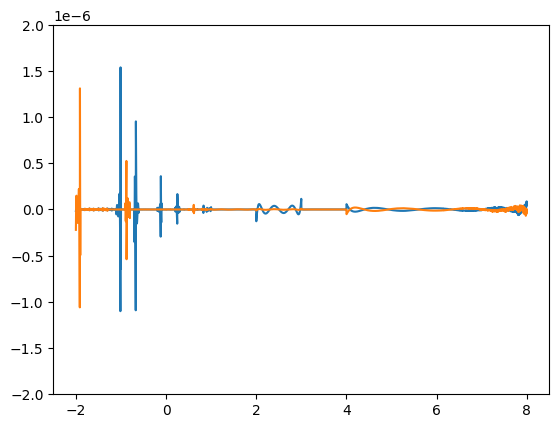

In [8]:
plt.plot(X, Y_lower - lower_PPFit.apply(X))
plt.plot(X, Y_upper - upper_PPFit.apply(X))
plt.ylim([-2E-6, 2E-6])

In [9]:
X = np.log10(N_array)
Y_lower_linear = np.log10(linear_error_bar_matrix[:, 0])
Y_upper_linear = np.log10(linear_error_bar_matrix[:, 1])

inc = 0.1
edges = np.concat([
    np.arange(-2, 1 + inc, inc), np.array([2, 3, 4, 8])
])
lower_PPFit_linear = get_PPFit(
    X, Y_lower_linear, edges, polynomial_degree_7
)
upper_PPFit_linear = get_PPFit(
    X, Y_upper_linear, edges, polynomial_degree_7
)

(-2e-06, 2e-06)

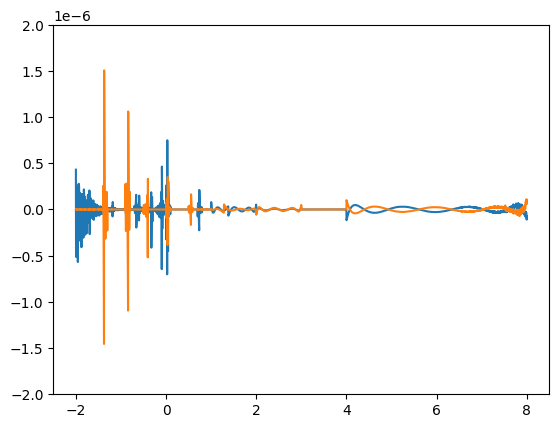

In [10]:
plt.plot(X, Y_lower_linear - lower_PPFit_linear.apply(X))
plt.plot(X, Y_upper_linear - upper_PPFit_linear.apply(X))
plt.ylim([-2E-6, 2E-6])

In [11]:
save_PPFit(lower_PPFit, 'saved/lower_PPFit')
save_PPFit(upper_PPFit, 'saved/upper_PPFit')
save_PPFit(lower_PPFit_linear, 'saved/lower_PPFit_linear')
save_PPFit(upper_PPFit_linear, 'saved/upper_PPFit_linear')

In [12]:
X = np.log10(N_array)
Y_val_auto_log = auto_log_error_bar_matrix[:, 0]
Y_lower_auto_log = np.log10(auto_log_error_bar_matrix[:, 1])
Y_upper_auto_log = np.log10(auto_log_error_bar_matrix[:, 2])

inc = 0.1
edges = np.concat([
    np.arange(-2, 1 + inc, inc), np.array([2, 3, 4, 8])
])
val_PPFit_auto_log = get_PPFit(
    X, Y_val_auto_log, edges, polynomial_degree_7
)
lower_PPFit_auto_log = get_PPFit(
    X, Y_lower_auto_log, edges, polynomial_degree_7
)
upper_PPFit_auto_log = get_PPFit(
    X, Y_upper_auto_log, edges, polynomial_degree_7
)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1800.

In [ ]:
plt.plot(X, Y_val_auto_log - val_PPFit_auto_log.apply(X))
plt.plot(X, Y_lower_auto_log - lower_PPFit_auto_log.apply(X))
plt.plot(X, Y_upper_auto_log - upper_PPFit_auto_log.apply(X))
plt.ylim([-2E-2, 2E-2])

In [ ]:
X = np.log10(N_array)
Y_val_median = np.log10(median_error_bar_matrix[:, 0])
Y_lower_median = np.log10(median_error_bar_matrix[:, 1])
Y_upper_median = np.log10(median_error_bar_matrix[:, 2])

inc = 0.1
edges = np.concat([
    np.arange(-2, 1 + inc, inc), np.array([2, 3, 4, 8])
])
val_PPFit_median = get_PPFit(
    X, Y_val_median, edges, polynomial_degree_7
)
lower_PPFit_median = get_PPFit(
    X, Y_lower_median, edges, polynomial_degree_7
)
upper_PPFit_median = get_PPFit(
    X, Y_upper_median, edges, polynomial_degree_7
)

In [ ]:
plt.plot(X, Y_val_median - val_PPFit_median.apply(X))
plt.plot(X, Y_lower_median - lower_PPFit_median.apply(X))
plt.plot(X, Y_upper_median - upper_PPFit_median.apply(X))
plt.ylim([-2E-6, 2E-6])

In [ ]:
X = np.log10(N_array)
Y_val_mean = np.log10(mean_error_bar_matrix[:, 0])
Y_std_mean = np.log10(mean_error_bar_matrix[:, 1])
Y_skewness_mean = np.log10(mean_error_bar_matrix[:, 2])

inc = 0.1
edges = np.concat([
    np.arange(-2, 1 + inc, inc), np.array([2, 3, 4, 8])
])
val_PPFit_mean = get_PPFit(
    X, Y_val_mean, edges, polynomial_degree_7
)
std_PPFit_mean = get_PPFit(
    X, Y_std_mean, edges, polynomial_degree_7
)
skewness_PPFit_mean = get_PPFit(
    X, Y_skewness_mean, edges, polynomial_degree_7
)

In [ ]:
plt.plot(X, Y_val_mean - val_PPFit_mean.apply(X))
plt.plot(X, Y_std_mean - std_PPFit_mean.apply(X))
plt.plot(X, Y_skewness_mean - skewness_PPFit_mean.apply(X))
plt.ylim([-2E-6, 2E-6])